In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
data=pd.read_csv('prosperLoanData.csv')

In [3]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## 借款人发起借款的时间段

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

* ListingCreationDate:表创建时间(可能是交易开始计息时间)
* LoanStatus：贷款状态(Completed、Current、Defaulted、Chargedoff等)
* EmploymentStatus:受雇佣状态(Self-employed、Employed等)
* EmploymentStatusDuration:受雇佣状态持续时间(以月为计算单位)
* IsBorrowerHomeowner:借款人是否拥有房屋
* CreditScoreRangeLower/CreditScoreRangeUpper:消费信用最低/最高分
* InquiriesLast6Months:最近6个月查过多少次征信记录
* BorrowerRate:借款标利率,作为P2P平台资金借贷价格的代理变量,BorrowerRate不包含其他费用,是筹资者付给投资人的报酬,也是融资最直接和最重要的成本,其体现了资金供求双方在综合考虑各种因素情况下所认可的资金使用成本.
* Term:期限,筹资者通过网贷平台进行借款时所承诺的最终偿还期限,借款期限体现该资产的流动性,期限较长的资产应存在着流动性溢价(利率上涨).
* CreditGrade/ProsperRating(Alpha):信用等级,前者反映的是2009年7月1日前客户的信用等级,后者反映的是2009年7月1日后的信用等级.信用等级越高,其偿债能力越强.
* CreditScore:由消费信用公司提供的消费信用评分,类似于国内的芝麻信用分。
* StatedMonthlyIncome:客户月收入,月收入越高,投资者对该借款本息按时回流越有信心.
* DelinquenciesLast7Years:信用资料提交时借款人过去7年违约次数,该指标在一定程度上可以体现借款标的发布者的信用状况
* BankCarduse:信用资料提交时借款人信用卡使用额度和信用卡总透支额度的百分比,本文将这个数据分成四组(mild use;medium use;heavy use;super use)
* LoanOriginalAmount:借款人在借款时已经向prosper借入的资金,如果没有历史记录则为0,显然,借入本金越多,其还款压力越大,但是这项指标大的话也可能说明该客户对prosper依赖性较强.
* DebtToIncomeRatio:借款人的债务收入比,债务收入比越高说明筹资者财务状况越差,还款能力较低.其向P2P平台借款时,投资者应要求有更高的回报.
* Occupation:贷款人职业
* IncomeRange:贷款人年收入范围
* BorrowerState:贷款人所在州
* Customer_clarify:0或NA是未在prosper贷过款的客户,反之是贷过款的。

In [3]:
#对时间进行分列，提取小时数据
time_split = pd.DataFrame((x.split(' ') for x in data.ListingCreationDate),index=data.index,columns=['pickup_date','pickup_time'])
 
#将分列后的时间字段与原始数据表合并
data=pd.merge(data,time_split,right_index=True, left_index=True)
 
#对合并后的数据表中的时间字段更改为时间格式
data['pickup_time']=pd.to_datetime(data['pickup_time'])
 
#将时间字段设置为数据表的索引字段
data = data.set_index('pickup_time')
 
#按小时对数据表进行计算汇总
pickup_time=data['ListingKey'].resample('H',how=len)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


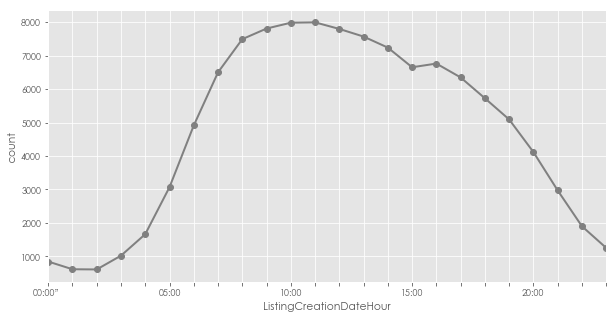

In [4]:
#绘制24小时借款人借贷分布图
import numpy as np
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.rc('font', family='STXihei', size=9)
a=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.plot(a,pickup_time,'go-',color='gray',linewidth=2,markeredgewidth=1)
plt.xlabel('ListingCreationDateHour')
plt.ylabel('count')
plt.xlim(0,23)
plt.xticks(a,('00:00”','','','','','05:00','','','','','10:00','','','','','15:00','','','','','20:00','','',''))
plt.show()

## 信用卡已用额度占比

In [16]:
#图表字体为华文细黑，字号为15
plt.rc('font', family='STXihei', size=15)

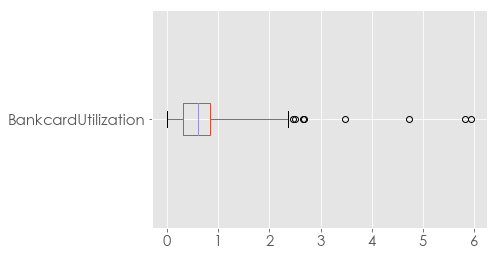

In [30]:
data.boxplot(column='BankcardUtilization',figsize=(10,5),whis=3,vert = False)
plt.show()

这个数据居然能够超过100%，我觉得有点不可思议。后面我会将异常值过滤掉。大部分人的已用额度在30%到80%之间，中位数在60%左右。

## 月均交易量

In [6]:
data['ListingCreationDate']=pd.to_datetime(data['ListingCreationDate'])
#将载客时间字段设置为索引
data=data.set_index('ListingCreationDate')

In [7]:
month=data.resample('M',how=len)['ListingNumber']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [8]:
month.mean()

1128.0891089108911

## 月均交易金额

In [9]:
monthly_data=data.resample('M',how=sum)['LoanOriginalAmount']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [10]:
monthly_data.mean()

9998887.863157894

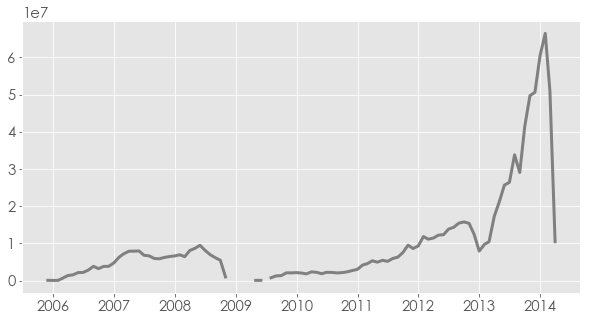

In [15]:
plt.figure(figsize=(10,5))
plt.plot(monthly_data,'g-',color='gray',linewidth=3,markeredgewidth=2)
plt.show()

In [16]:
import datetime
x = datetime.datetime(2005,11,30)
 
y = datetime.datetime(2014,3,31)
 
def month_differ(x, y):
    """暂不考虑day, 只根据month和year计算相差月份
    Parameters
    ----------
    x, y: 两个datetime.datetime类型的变量
 
    Return
    ------
    differ: x, y相差的月份
    """
    month_differ = abs((x.year - y.year) * 12 + (x.month - y.month) * 1)
    return month_differ
 
print(month_differ(x, y))

100


In [17]:
int(len(data)/100)

1139

## 每笔交易平均有多少个投资者

In [18]:
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


 最少的借款金额为1000美元，最多的借款金额为35,000美元，中值为6500美元，均值为8337美元。

In [19]:
data[data['Investors'].isin([1189])].LoanOriginalAmount

ListingCreationDate
2009-12-01 12:23:48.377    20000
Name: LoanOriginalAmount, dtype: int64

投资人最多(1189人)的一笔贷款的贷款金额是多少呢？这会不会是笔大生意？

其实，贷款金额如上图所示：20，000美元，所以，如果这笔借款成为坏账，每个人损失的金额也不大。这就是P2P网贷平台的优势所在：能够把风险分散化。

In [20]:
Investors_1=len(data[data['Investors'].isin([1])])

In [21]:
rest=len(data)-Investors_1

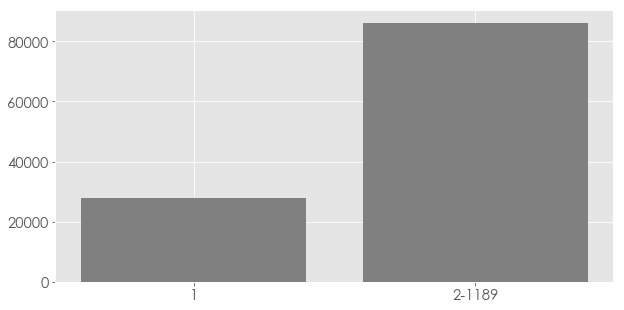

In [22]:
plt.subplots(figsize=(10,5))
plt.rc('font', family='SimHei', size=13)
plt.bar(1,Investors_1, label='1',color='gray')
plt.bar(2,rest,label='2-1189',color='gray')
plt.xticks([1,2],['1','2-1189'])
plt.show()

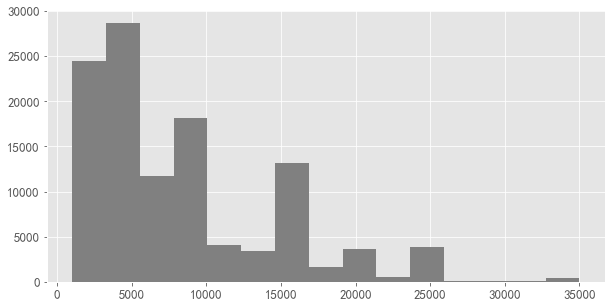

In [24]:
data['LoanOriginalAmount'].hist(bins=15,facecolor='gray',alpha=1.0,figsize=(10,5))
plt.show()

我们看到Prosper平台的借款金额主要以15000以下的小额借款为主。其中几个数额的借款人数很多，4000元、10000元、15000元。也充分说明P2P网贷小额普惠的性质。

## 风险评级

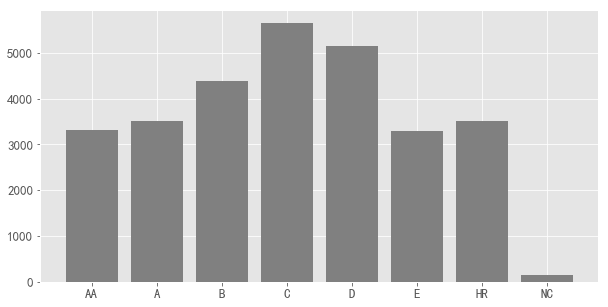

In [25]:
plt.subplots(figsize=(10,5))
labels = ['AA', 'A', 'B', 'C', 'D','E','HR','NC']
count_by_CreditGrade=data.groupby('CreditGrade')['CreditGrade'].count()
plt.bar(range(len(count_by_CreditGrade)),count_by_CreditGrade, tick_label=labels,facecolor='gray')
plt.show()

图中'AA', 'A', 'B', 'C', 'D','E','HR','NC'评级依次从大到小，看到风险评级的分布中，中等风险的数量最多，高风险和低风险的数量较少,整体呈现类似正态分布。

## 风险评分

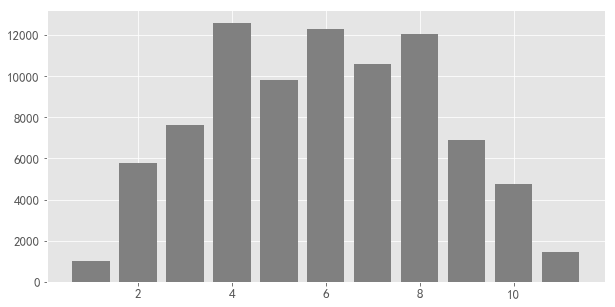

In [26]:
plt.subplots(figsize=(10,5))
count_by_ProsperScore=data.groupby('ProsperScore')['ProsperScore'].count()
plt.bar(count_by_ProsperScore.index,count_by_ProsperScore,facecolor='gray')
plt.show()

我们看到风险评分的4分、6分、8分的数量最多。高分和低分的较少。

## 借款期数

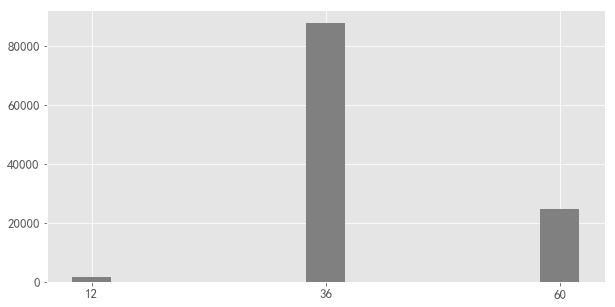

In [27]:
plt.subplots(figsize=(10,5))
count_by_Term=data.groupby('Term')['Term'].count()
plt.bar(count_by_Term.index,count_by_Term,facecolor='gray',width=4)
plt.xticks(count_by_Term.index)
plt.show()

我们看到Prosper的借款期数主要以长期为主。其中3年期最多，其次是5年期。我们知道一般而言，借款人信用越好，能借到的期数越长，这说明Prosper的借款人的信用看起来还不错

## 借款人征信数据的信用评分上下限的均值

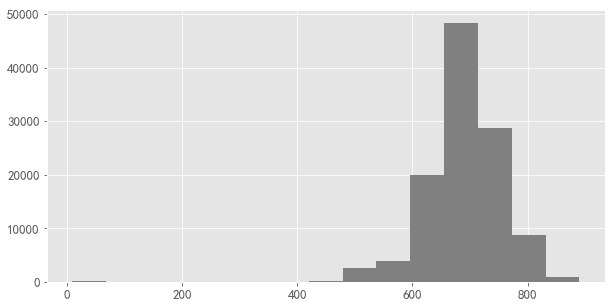

In [29]:
data['CreditScoreRangeMean']=(data['CreditScoreRangeLower']+ data['CreditScoreRangeUpper'])/2
data['CreditScoreRangeMean'].hist(bins=15,facecolor='gray',alpha=1.0,figsize=(10,5))
plt.show()

我们看到这个分布呈右偏分布，有一些借款人的征信信用评分相对比较高。

## 借款人当前职业持续月数

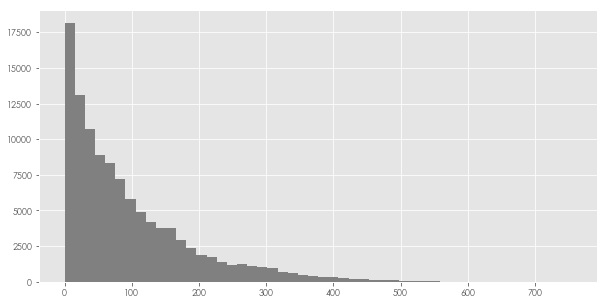

In [31]:
data['EmploymentStatusDuration'].hist(bins=50,facecolor='gray',alpha=1.0,figsize=(10,5))
plt.show()

从图中可以看出这是一个右偏数据，整体呈现出随着月份增加数量逐渐递减，几乎没有人能够从事一个职位50年以上。